In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.decomposition import PCA
pca = PCA()

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

Import neccessary libraries

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\DS\Internship\Project-Housing_splitted\train.csv")
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

Import and Visualise the data

We have to predict
- The variables which affect the sales price of the property
- The actual value of the prospective properties by building machine learning model

Label
- MSSubClass: Identifies the type of dwelling involved in the sale.
- MSZoning: Identifies the general zoning classification of the sale.
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access to property
- Alley: Type of alley access to property
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to various conditions
- Condition2: Proximity to various conditions (if more than one is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Rates the overall material and finish of the house
- OverallCond: Rates the overall condition of the house
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Evaluates the quality of the material on the exterior 
- ExterCond: Evaluates the present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Evaluates the height of the basement
- BsmtCond: Evaluates the general condition of the basement
- BsmtExposure: Refers to walkout or garden level walls
- BsmtFinType1: Rating of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Rating of basement finished area (if multiple types)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
- Kitchen: Kitchens above grade
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality (Assume typical unless deductions are warranted)
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold (MM)
- YrSold: Year Sold (YYYY)
- SaleType: Type of sale
- SaleCondition: Condition of sale

Target
- SalePrice

In [3]:
data.shape

(1168, 81)

The data set has 1168 rows and 80 columns where Id is not going to help with the analysis

In [4]:
data = data.drop(['Id'],axis=1)

Dropped the column which does not give any clue to analysis

In [5]:
pd.set_option('display.max_rows', None)
data.nunique().sort_values()

Utilities          1
CentralAir         2
Street             2
Alley              2
BsmtHalfBath       3
PavedDrive         3
GarageFinish       3
LandSlope          3
PoolQC             3
HalfBath           3
FullBath           4
LotShape           4
MasVnrType         4
BsmtFullBath       4
Fireplaces         4
BsmtCond           4
BsmtExposure       4
KitchenAbvGr       4
MiscFeature        4
Fence              4
ExterQual          4
KitchenQual        4
LandContour        4
BsmtQual           4
HeatingQC          5
GarageQual         5
GarageCars         5
Electrical         5
GarageCond         5
FireplaceQu        5
ExterCond          5
MSZoning           5
YrSold             5
LotConfig          5
BldgType           5
BsmtFinType1       6
BsmtFinType2       6
RoofStyle          6
Heating            6
SaleCondition      6
Foundation         6
GarageType         6
Functional         7
BedroomAbvGr       8
Condition2         8
HouseStyle         8
RoofMatl           8
PoolArea     

In [6]:
data = data.drop(['Utilities'],axis=1)

Dropped utilities, since it has a single value

The following are the categorical variables

Utilities, CentralAir, Street, Alley, BsmtHalfBath, PavedDrive, GarageFinish, LandSlope, PoolQC, HalfBath, FullBath, LotShape, MasVnrType, BsmtFullBath, Fireplaces, BsmtCond, BsmtExposure, KitchenAbvGr, MiscFeature, Fence, ExterQual, KitchenQual, LandContour, BsmtQual, HeatingQC, GarageQual, GarageCars, Electrical, GarageCond, FireplaceQu, ExterCond, MSZoning, YrSold, LotConfig, BldgType, BsmtFinType1, BsmtFinType2, RoofStyle, Heating, SaleCondition, Foundation, GarageType, Functional, BedroomAbvGr, Condition2, HouseStyle, RoofMatl, PoolArea, Condition1, OverallCond, SaleType, OverallQual, MoSold, TotRmsAbvGrd, Exterior1st, MSSubClass, Exterior2nd

The other variables are considered continuous

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          77 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

- 34 features are in integer, 3 features have float type of data with 43 features in object type
- The object type data has to be encoded

## EDA and Data Preprocessing

In [8]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'O

In [9]:
data.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

The following cannot be treated because there is more NaN values

- Alley            1091
- MiscFeature      1124
- PoolQC           1161
- Fence             931

The following can be treated by any of the filling NaN methods

- LotFrontage       214
- MasVnrType          7
- MasVnrArea          7
- BsmtQual           30
- BsmtCond           30
- BsmtExposure       31
- BsmtFinType1       30
- BsmtFinType2       31
- FireplaceQu       551
- GarageType         64
- GarageYrBlt        64
- GarageFinish       64
- GarageQual         64
- GarageCond         64

In [10]:
data = data.drop(['Alley','MiscFeature','PoolQC','Fence'],axis=1)

Dropped the variables where NaN's cannot be treated. The other variables can be treated for NaN only after enoding 

In [11]:
data = data.apply(enc.fit_transform)

Thus all the columns are encoded using Label encoder

In [12]:
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)
data['MasVnrType'].fillna(data['MasVnrType'].mode()[0], inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].mean(), inplace=True)
data['BsmtQual'].fillna(data['BsmtQual'].mode()[0], inplace=True)
data['BsmtCond'].fillna(data['BsmtCond'].mode()[0], inplace=True)
data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0], inplace=True)
data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0], inplace=True)
data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0], inplace=True)
data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0], inplace=True)
data['GarageType'].fillna(data['GarageType'].mode()[0], inplace=True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean(), inplace=True)
data['GarageFinish'].fillna(data['GarageFinish'].mode()[0], inplace=True)
data['GarageQual'].fillna(data['GarageQual'].mode()[0], inplace=True)
data['GarageCond'].fillna(data['GarageCond'].mode()[0], inplace=True)

In [13]:
counter = 0
r,c = data.shape

data = data.copy()
data.drop_duplicates(inplace=True)
data.reset_index(drop=True,inplace=True)

if data.shape==(r,c):
    print('\n The dataset doesn\'t have any duplicates')
else:
    print(f'Number of duplicates dropped {r-data.shape[0]}')


 The dataset doesn't have any duplicates


<function matplotlib.pyplot.show(close=None, block=None)>

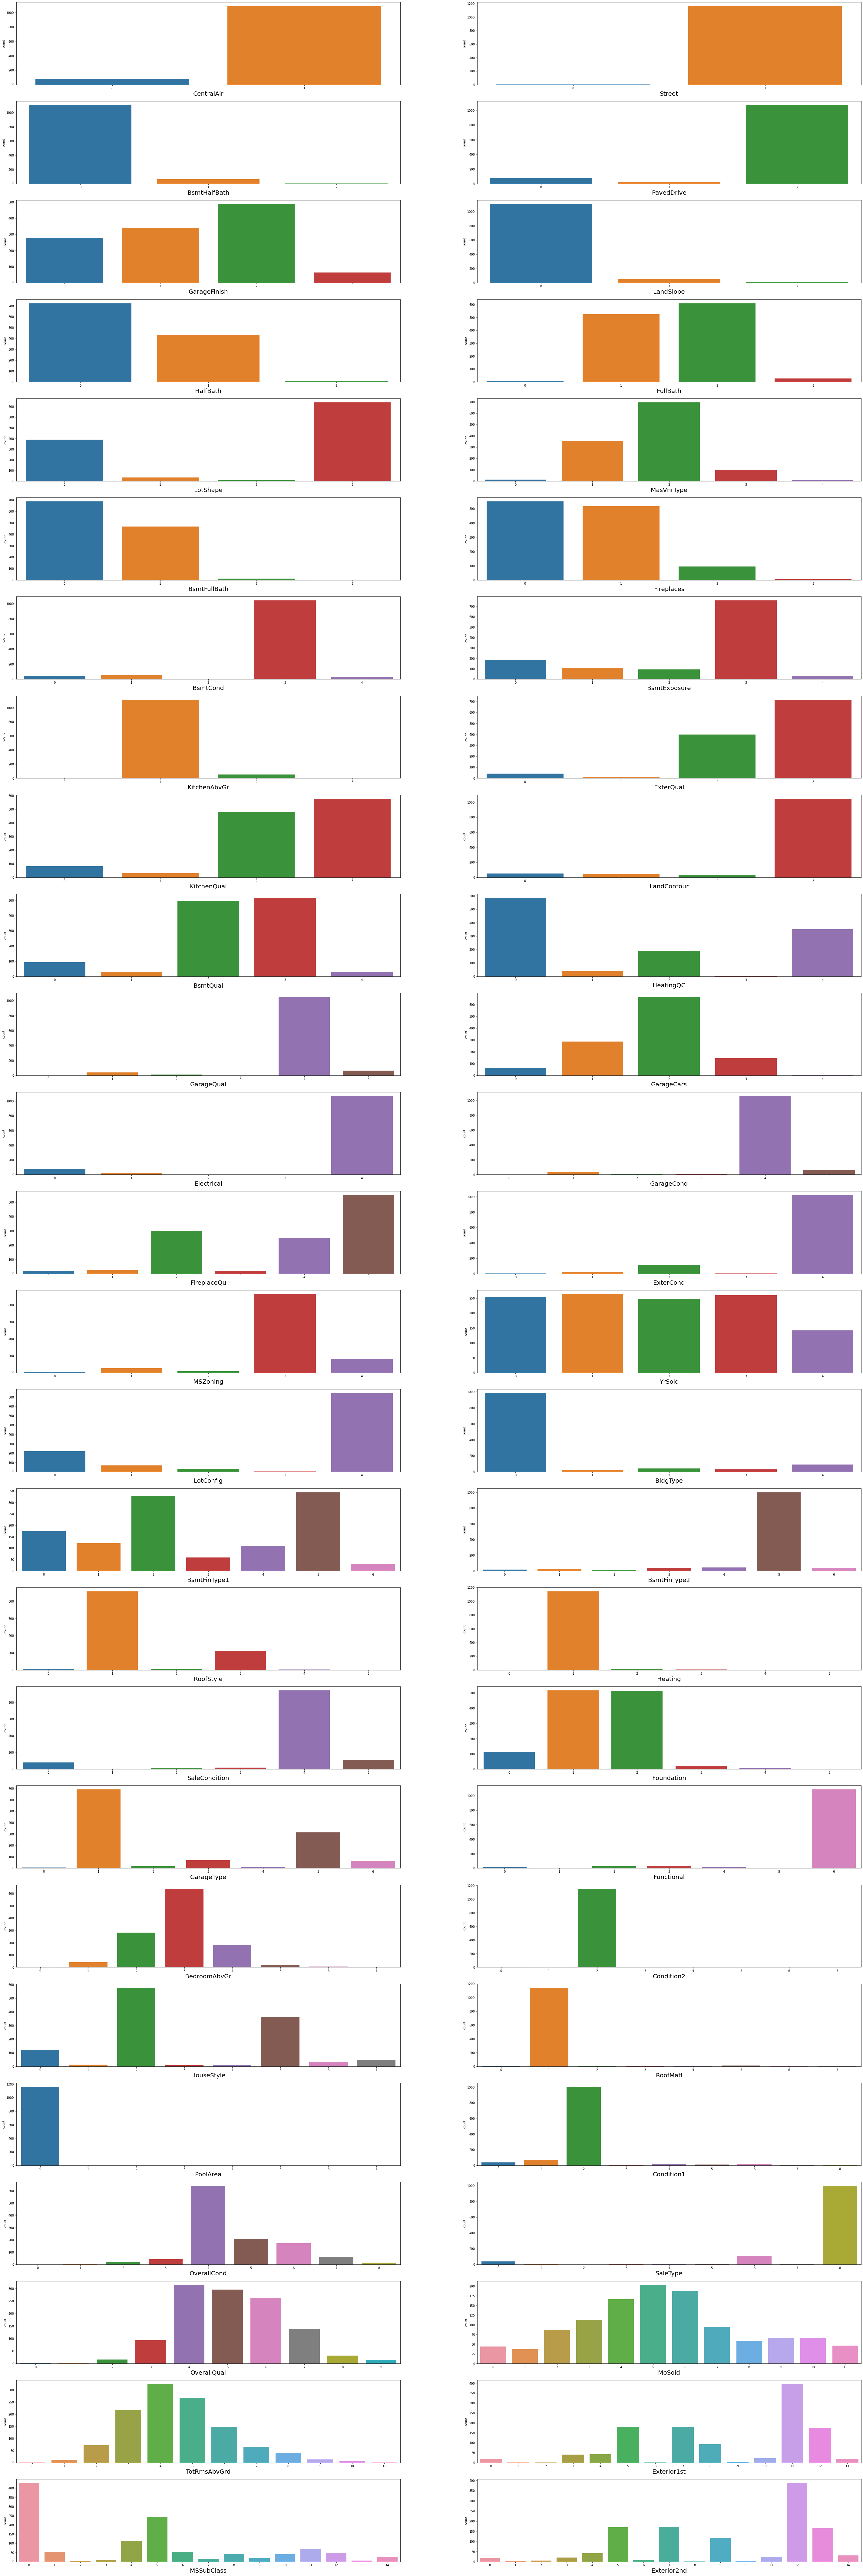

In [14]:
class_data = data[['CentralAir', 'Street', 'BsmtHalfBath', 'PavedDrive', 'GarageFinish', 'LandSlope', 'HalfBath', 'FullBath', 'LotShape', 'MasVnrType', 'BsmtFullBath', 'Fireplaces', 'BsmtCond', 'BsmtExposure', 'KitchenAbvGr', 'ExterQual', 'KitchenQual', 'LandContour', 'BsmtQual', 'HeatingQC', 'GarageQual', 'GarageCars', 'Electrical', 'GarageCond', 'FireplaceQu', 'ExterCond', 'MSZoning', 'YrSold', 'LotConfig', 'BldgType', 'BsmtFinType1', 'BsmtFinType2', 'RoofStyle', 'Heating', 'SaleCondition', 'Foundation', 'GarageType', 'Functional', 'BedroomAbvGr', 'Condition2', 'HouseStyle', 'RoofMatl', 'PoolArea', 'Condition1', 'OverallCond', 'SaleType', 'OverallQual', 'MoSold', 'TotRmsAbvGrd', 'Exterior1st', 'MSSubClass', 'Exterior2nd']]

plt.figure(figsize = (50,300), facecolor = 'white')
plotnumber = 1

for column in class_data:
    if plotnumber <= 100:
        ax =  plt.subplot(50,2,plotnumber)
        sns.countplot(x = column, data = class_data)
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

Mostly all the columns are imbalanced except yrsold. So, balance the dataset before training the model

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<function matplotlib.pyplot.show(close=None, block=None)>

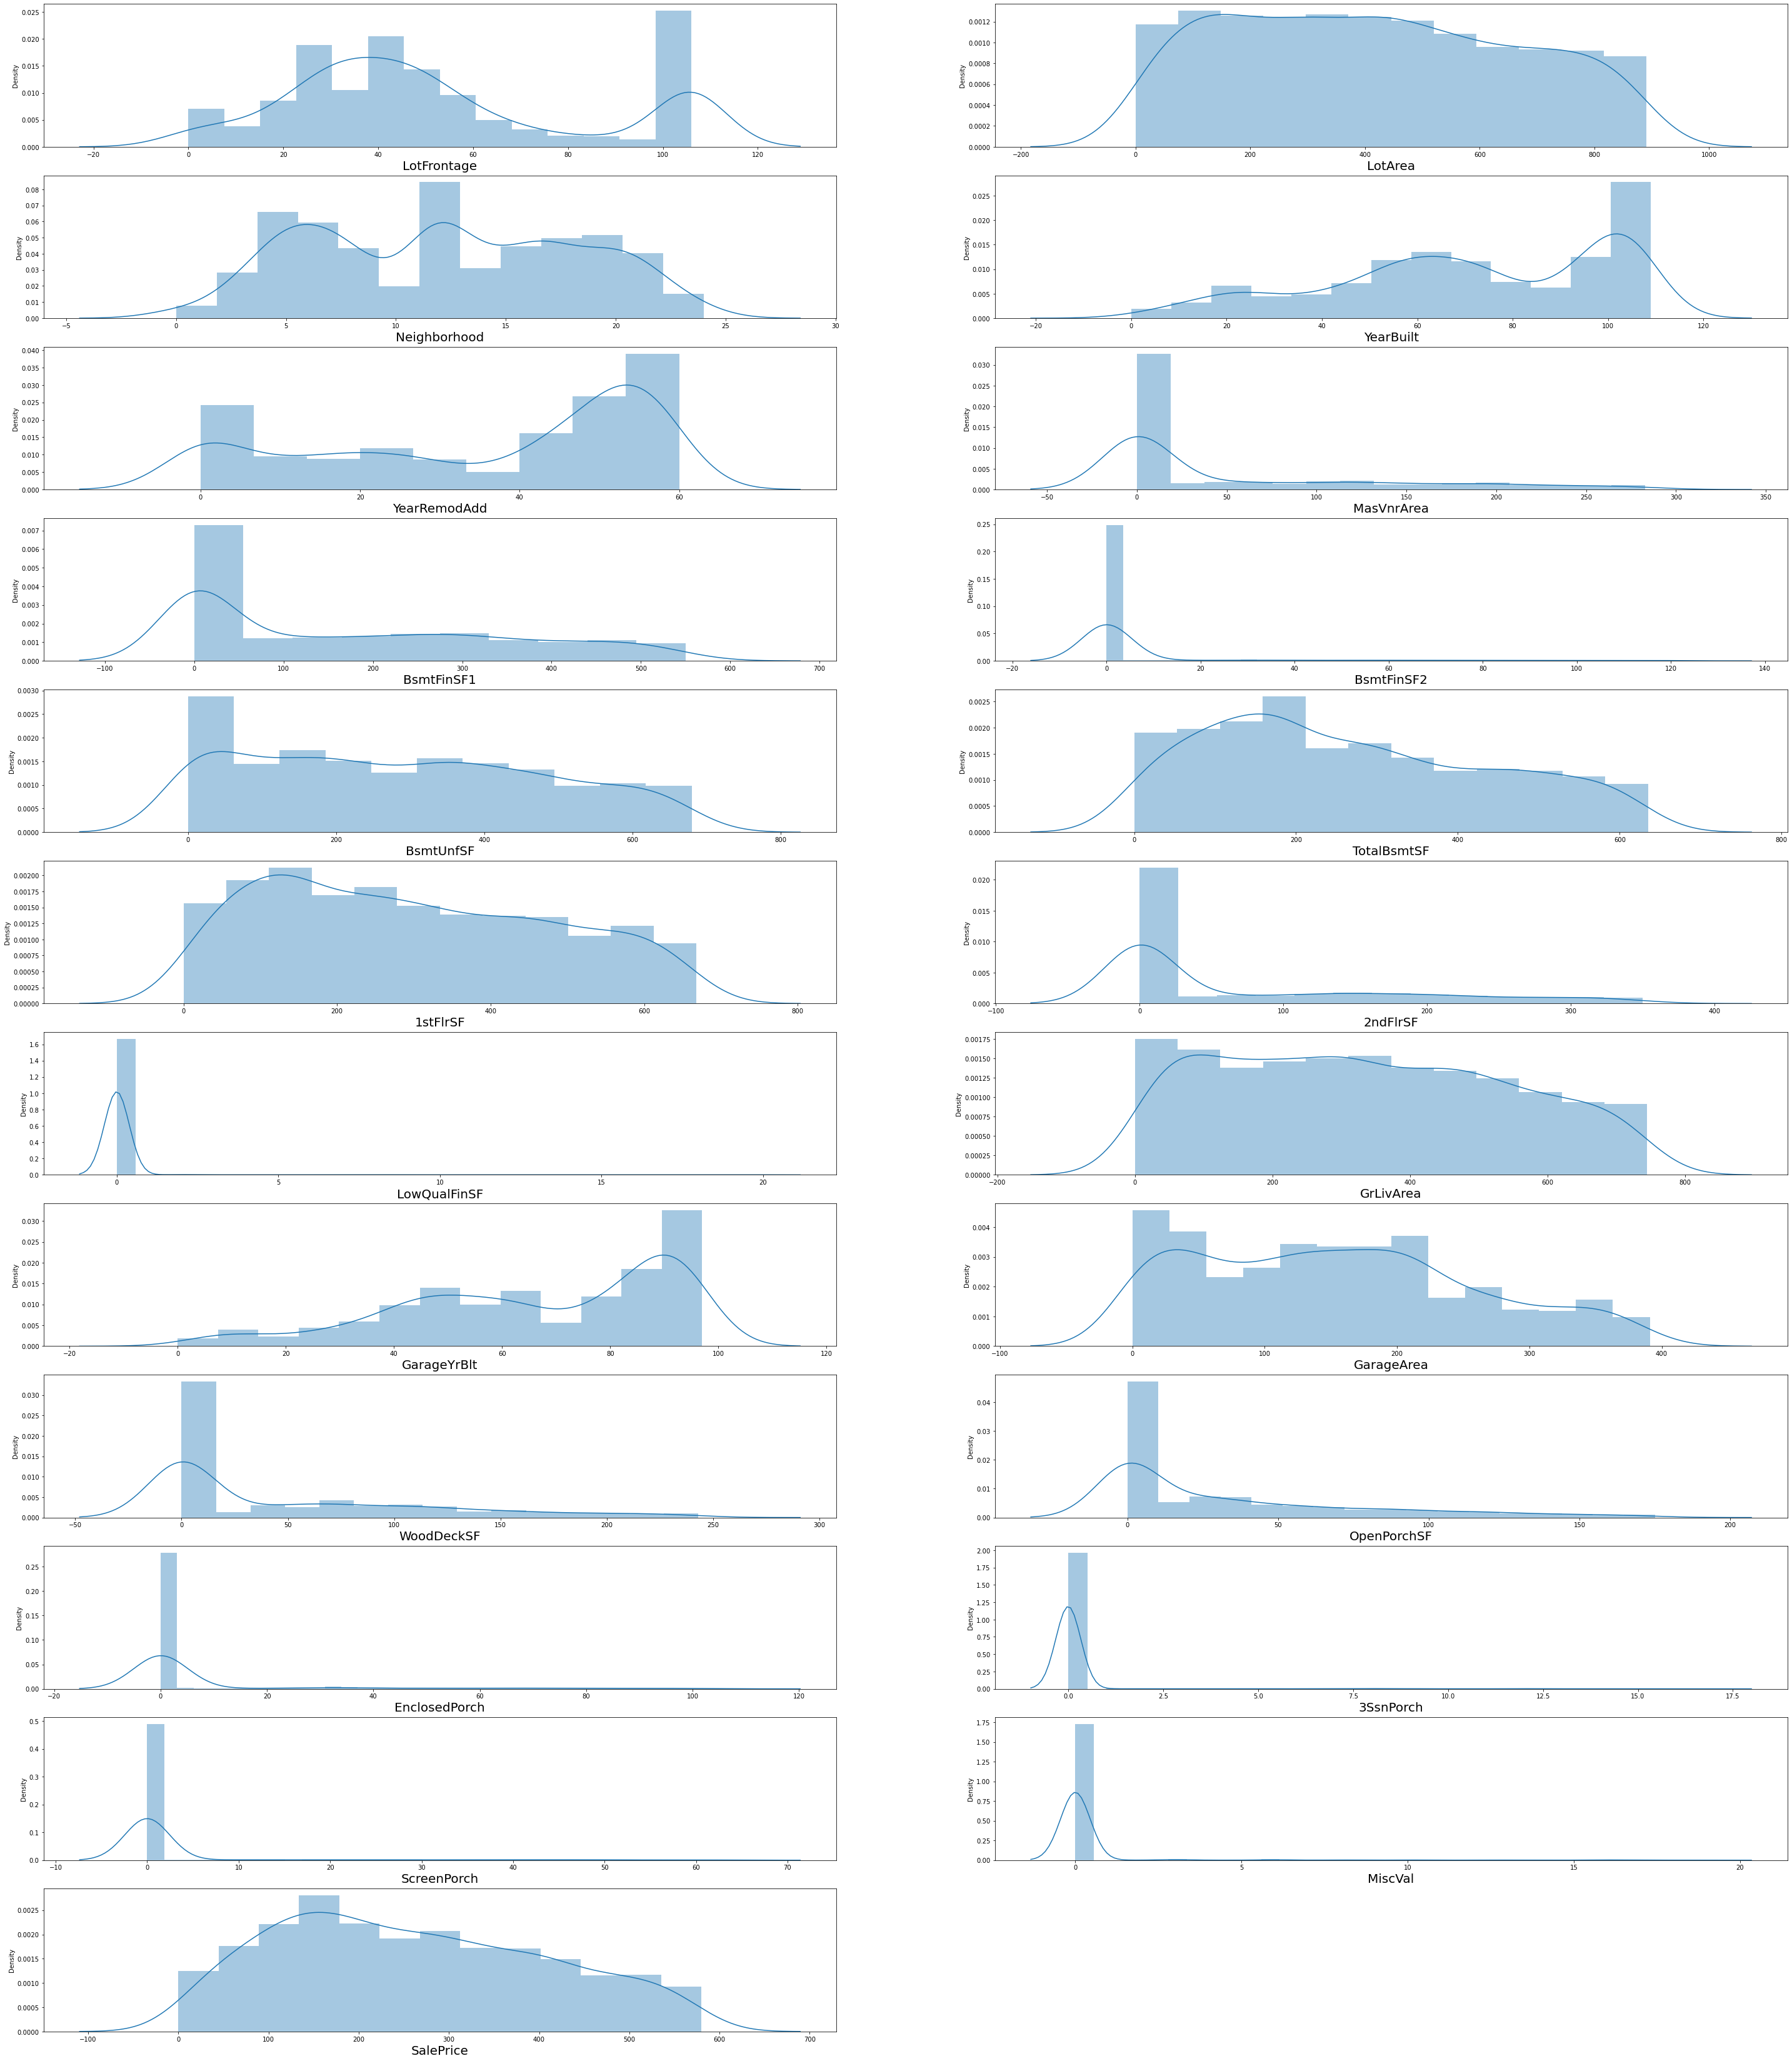

In [15]:
cont_data = data.drop(['CentralAir', 'Street', 'BsmtHalfBath', 'PavedDrive', 'GarageFinish', 'LandSlope', 'HalfBath', 'FullBath', 'LotShape', 'MasVnrType', 'BsmtFullBath', 'Fireplaces', 'BsmtCond', 'BsmtExposure', 'KitchenAbvGr', 'ExterQual', 'KitchenQual', 'LandContour', 'BsmtQual', 'HeatingQC', 'GarageQual', 'GarageCars', 'Electrical', 'GarageCond', 'FireplaceQu', 'ExterCond', 'MSZoning', 'YrSold', 'LotConfig', 'BldgType', 'BsmtFinType1', 'BsmtFinType2', 'RoofStyle', 'Heating', 'SaleCondition', 'Foundation', 'GarageType', 'Functional', 'BedroomAbvGr', 'Condition2', 'HouseStyle', 'RoofMatl', 'PoolArea', 'Condition1', 'OverallCond', 'SaleType', 'OverallQual', 'MoSold', 'TotRmsAbvGrd', 'Exterior1st', 'MSSubClass', 'Exterior2nd'],axis=1)

plt.figure(figsize = (50,100), facecolor = 'white')
plotnumber = 1

for column in cont_data:
    if plotnumber <= 40:
        ax =  plt.subplot(20,2,plotnumber)
        sns.distplot(cont_data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

All the values look standardised but it has more outliers which has to be treated

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\li

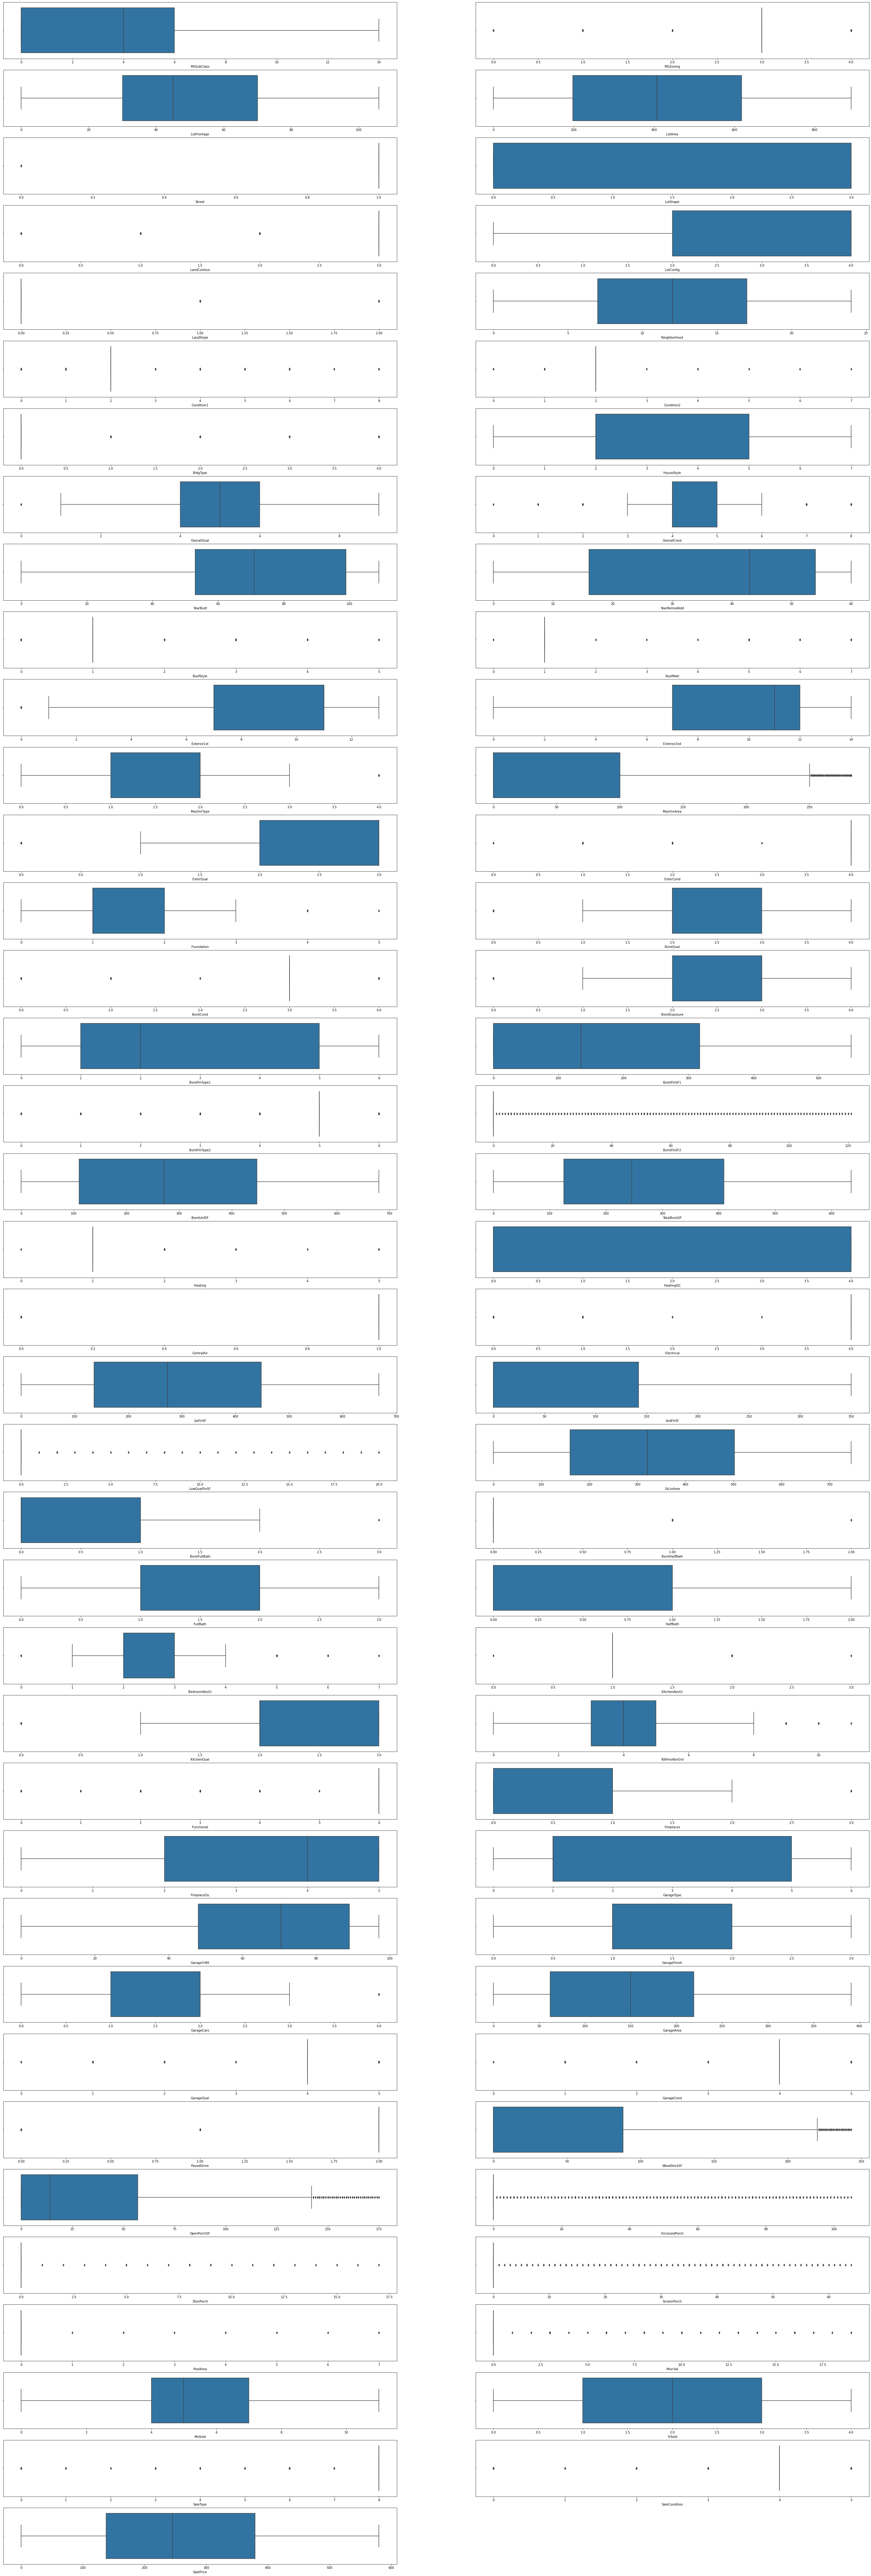

In [16]:
plt.figure(figsize=(50,200))
graph = 1
for column in data:
    if graph<= 100:
        ax = plt.subplot(50,2,graph)
        sns.boxplot(data[column],orient = 'V')
        plt.xlabel(column, fontsize=10)
    graph+=1
plt.show()

Looks like there are more outliers present in the data

In [17]:
z = np.abs(zscore(data))
data_new = data[(z<5).all(axis=1)]
print('Before removing outlier', data.shape)
print('After removing outlier', data_new.shape)

Before removing outlier (1168, 75)
After removing outlier (1009, 75)


In [18]:
Data_loss = ((1168-1009)/1168)*100
Data_loss

13.613013698630136

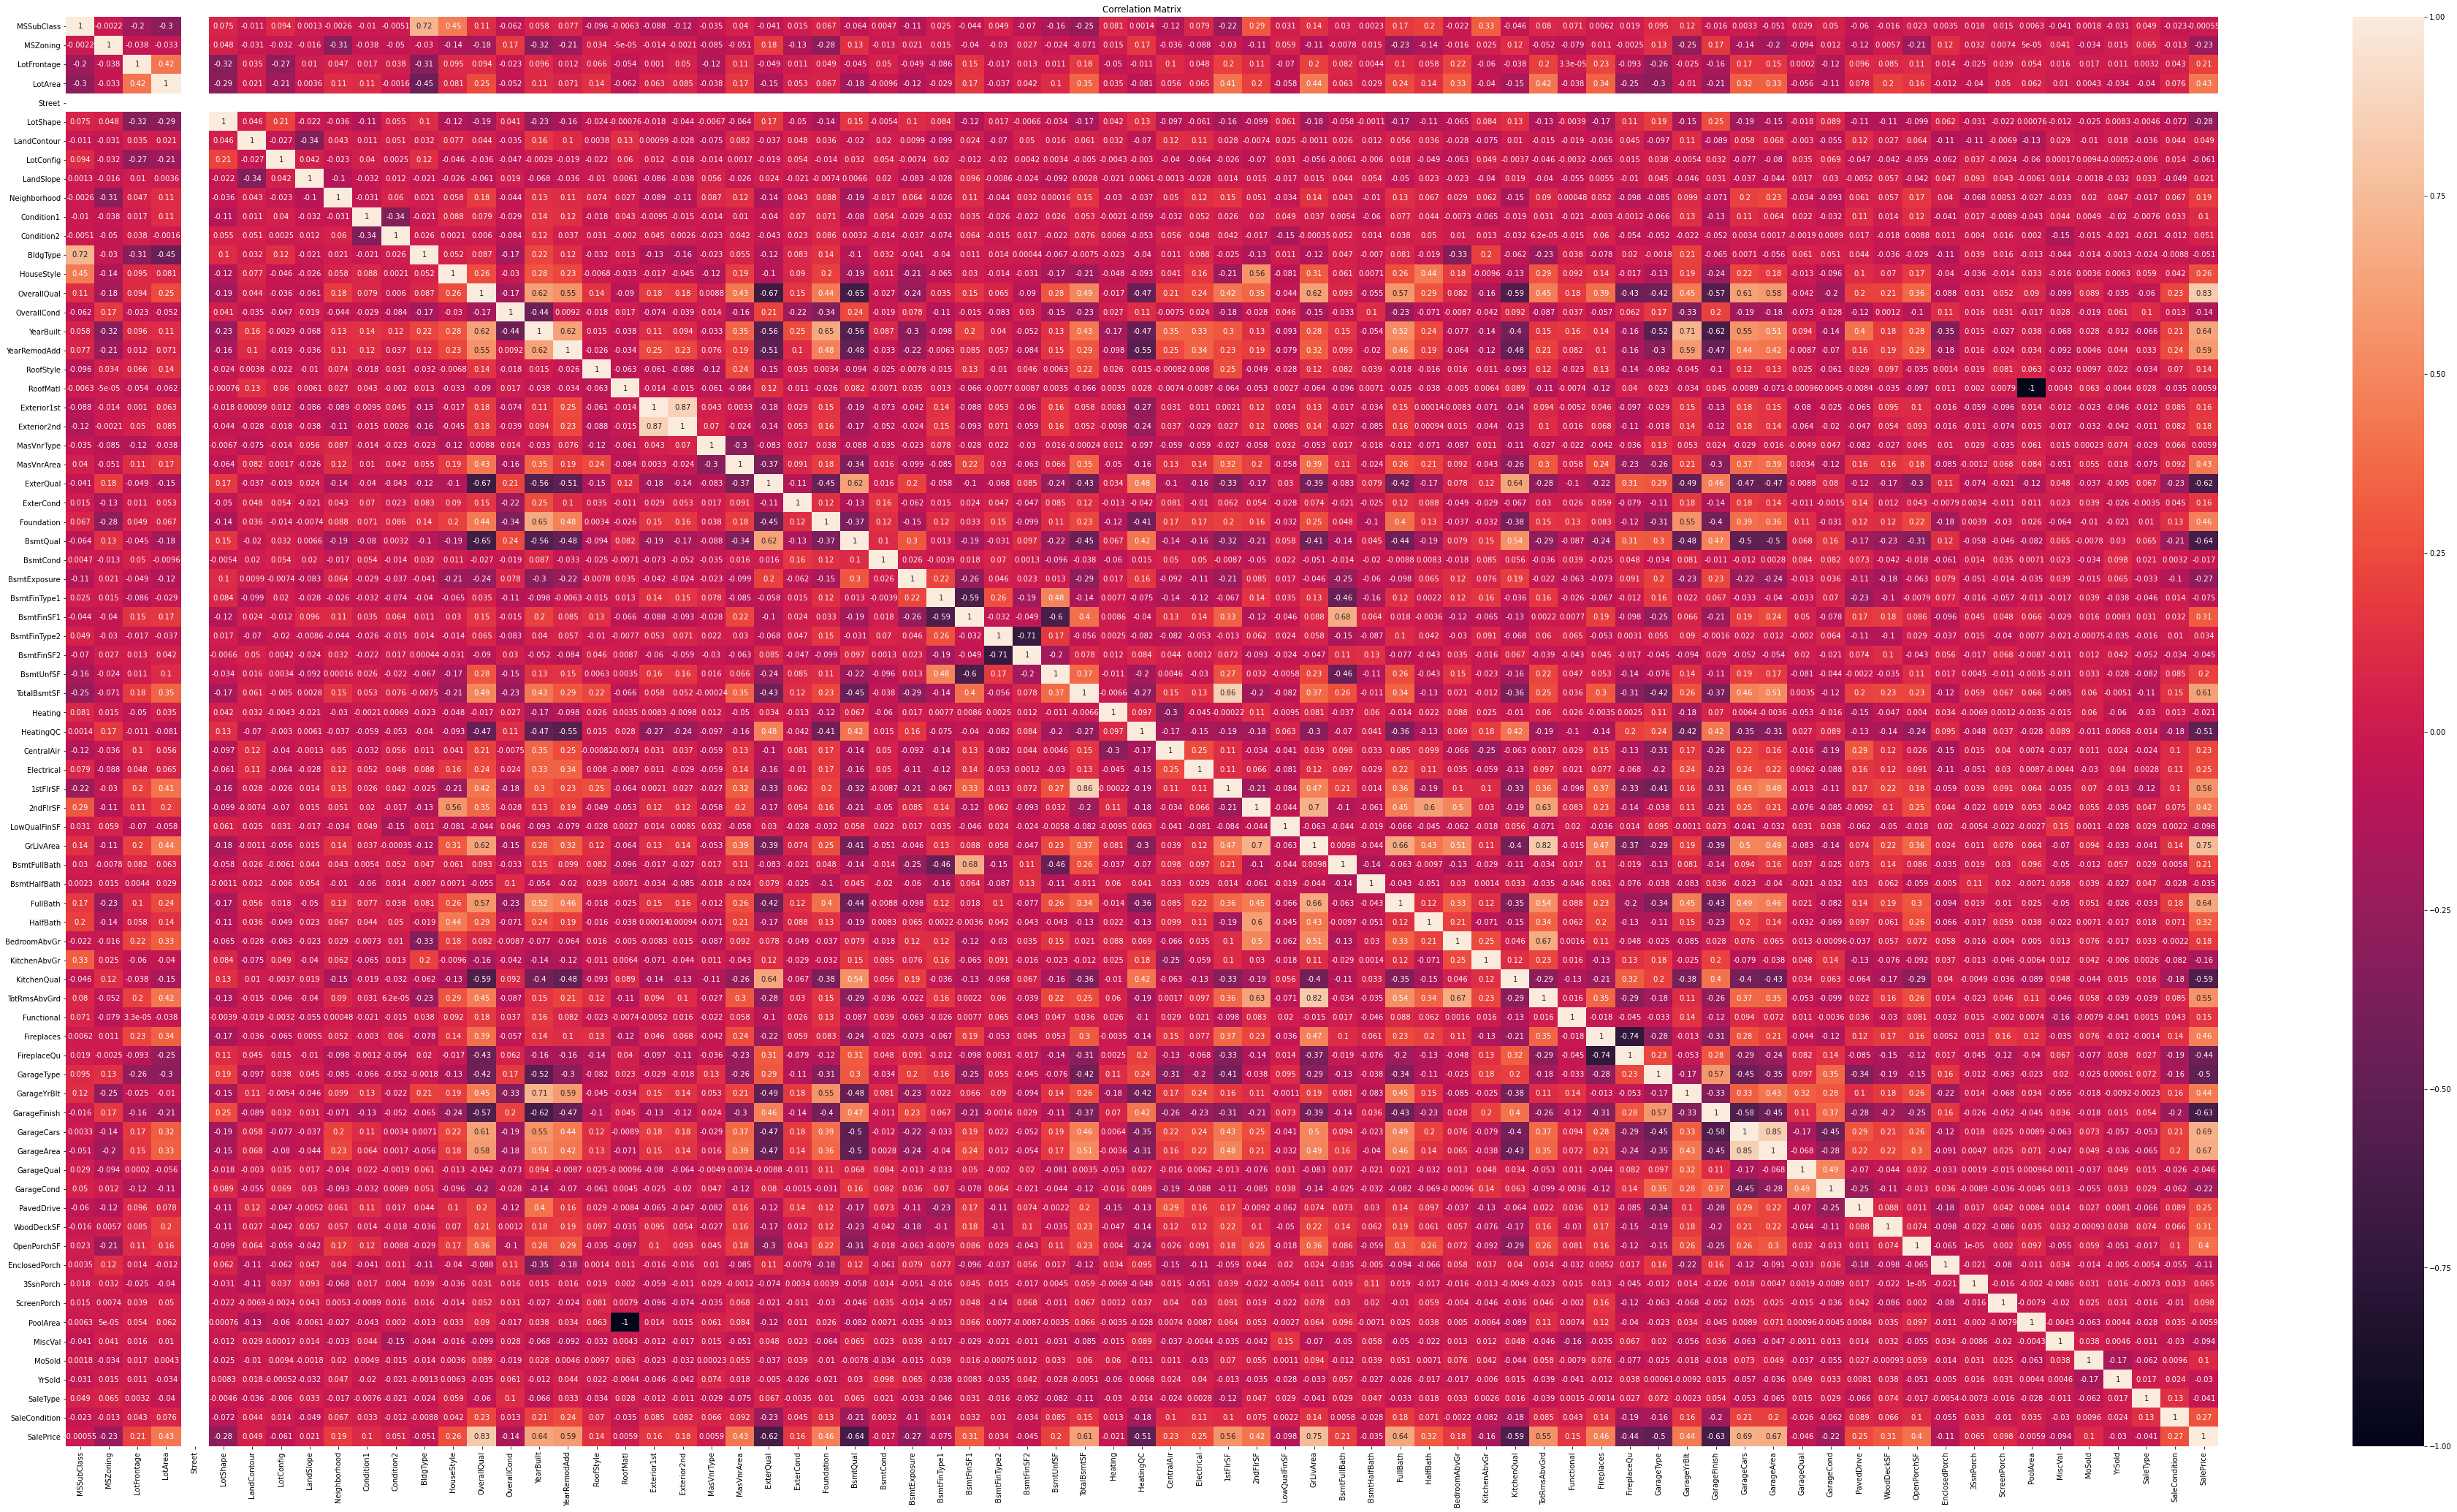

In [19]:
corr_mat = data_new.corr()
plt.figure(figsize=[66,36])
sns.heatmap(corr_mat,annot = True)
plt.title('Correlation Matrix')
plt.show()

- Remove street, Since it has only one value
- The maximum correlation found is 0.87. So, we need not remove any variable

In [20]:
data = data.drop(['Street'],axis=1)

In [21]:
corr_matrix = data.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817104
GrLivArea        0.735553
GarageCars       0.669420
GarageArea       0.658957
TotalBsmtSF      0.621147
FullBath         0.614222
YearBuilt        0.611207
1stFlrSF         0.584956
YearRemodAdd     0.583555
TotRmsAbvGrd     0.522691
Fireplaces       0.489372
LotArea          0.449715
MasVnrArea       0.429305
Foundation       0.424412
GarageYrBlt      0.409872
OpenPorchSF      0.406815
2ndFlrSF         0.404256
BsmtFinSF1       0.332347
WoodDeckSF       0.329477
HalfBath         0.325391
CentralAir       0.291834
Electrical       0.277493
PavedDrive       0.270185
HouseStyle       0.250300
SaleCondition    0.245379
LotFrontage      0.232875
BsmtFullBath     0.220856
BsmtUnfSF        0.185762
BedroomAbvGr     0.179225
Neighborhood     0.177082
RoofStyle        0.145666
Exterior2nd      0.141950
Exterior1st      0.139273
Condition1       0.137417
ExterCond        0.136273
Functional       0.128417
RoofMatl         0.121755
ScreenPorch 

## Data manipulation

In [22]:
x = data_new.drop('SalePrice',axis=1)
y = data_new['SalePrice']

In [23]:
x.skew().sort_values()

RoofMatl        -31.764760
Condition2      -15.811295
Functional       -4.222133
GarageQual       -4.021139
CentralAir       -4.017605
SaleType         -3.648121
PavedDrive       -3.646031
BsmtFinType2     -3.559547
Electrical       -3.422201
LandContour      -3.360783
BsmtCond         -3.203268
SaleCondition    -2.724389
ExterCond        -2.583777
ExterQual        -1.801295
MSZoning         -1.723577
KitchenQual      -1.424091
LotConfig        -1.213887
BsmtExposure     -1.130655
BsmtQual         -1.113132
FireplaceQu      -0.801586
GarageYrBlt      -0.652063
LotShape         -0.648072
Exterior1st      -0.592571
Exterior2nd      -0.590318
YearRemodAdd     -0.550825
YearBuilt        -0.539858
GarageCars       -0.336506
Foundation       -0.176962
GarageFinish     -0.095149
Street            0.000000
GarageCond        0.009112
BsmtFinType1      0.010101
Neighborhood      0.023004
FullBath          0.039220
BedroomAbvGr      0.104416
YrSold            0.115626
LotArea           0.175849
M

In [24]:
x_new = power_transform(x)
x = pd.DataFrame (x_new,columns = x.columns)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Thus the skewed data is managed

In [25]:
x_scaled = scaler.fit_transform(x)

Since there is different range of data, scale the data using Standard Scalar

## Feature Selection

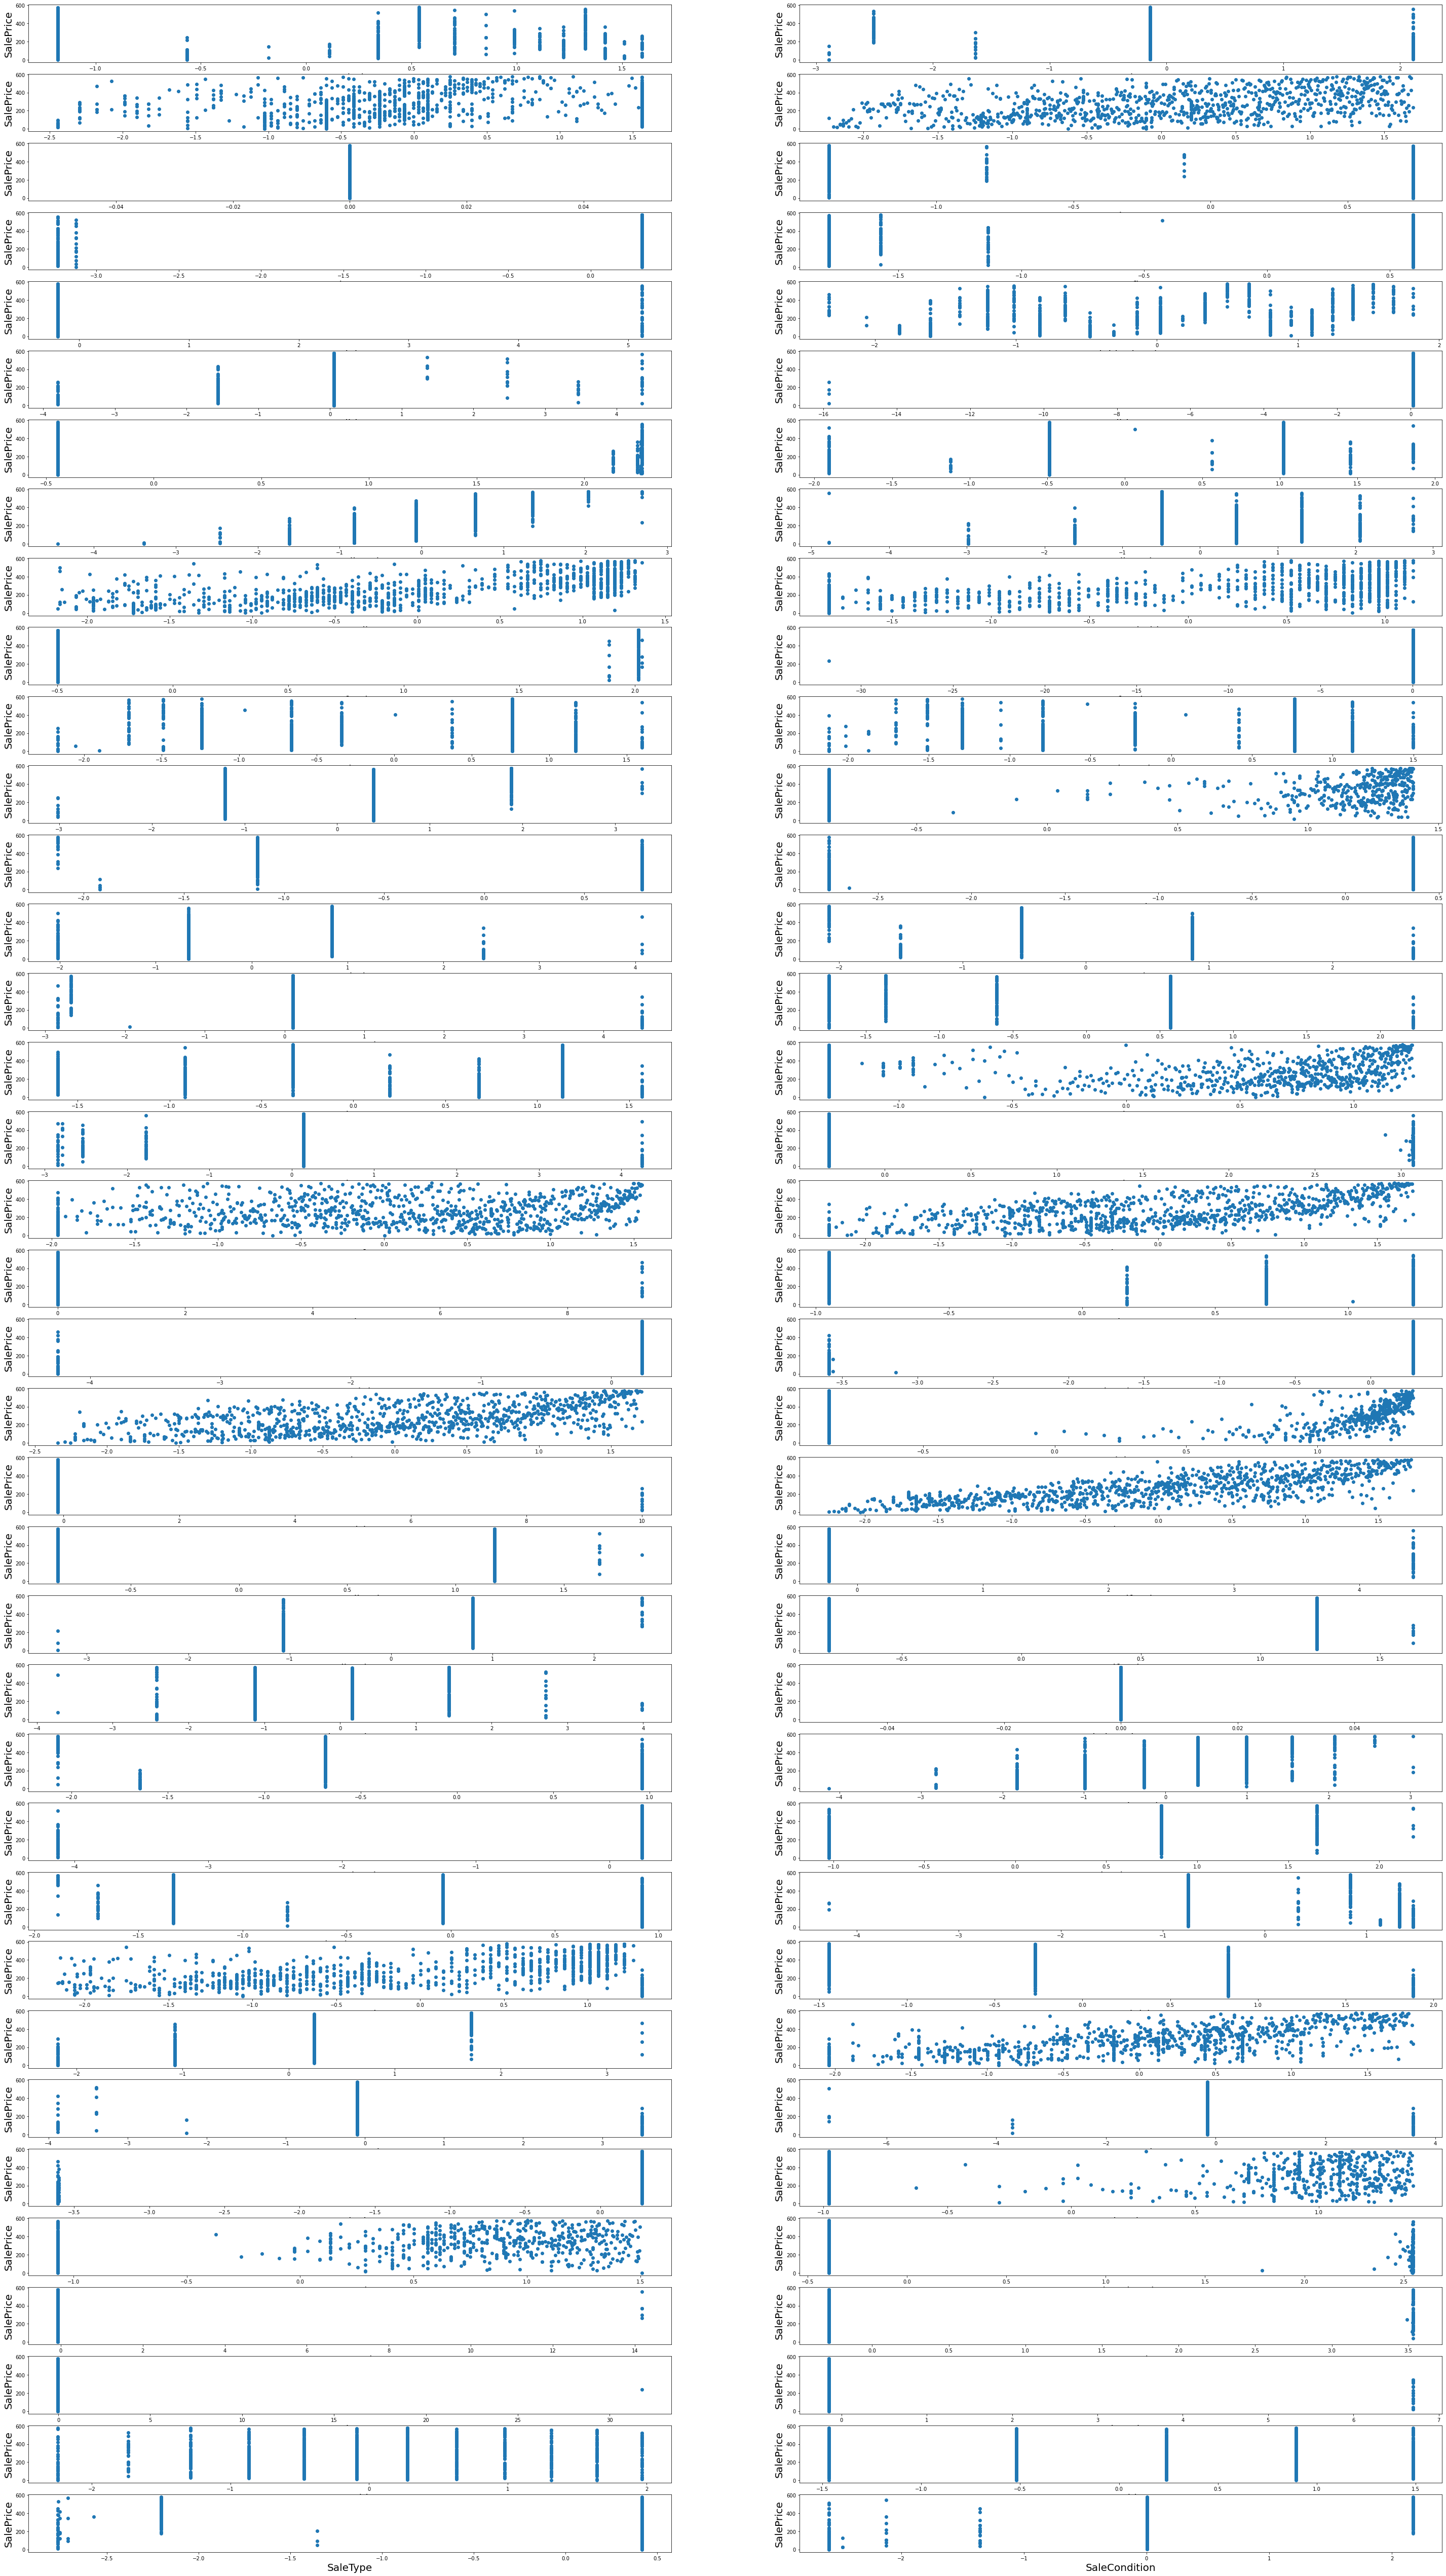

In [26]:
plt.figure(figsize = (50,100), facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber<=80:
        ax = plt.subplot(40,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('SalePrice', fontsize = 20)
    plotnumber+=1
plt.show()

The relationship between the labels and target looks fairly linear along with both categorical and continuous variables

In [27]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor (x_scaled,i)for i in range (x_scaled.shape[1])]
vif['Features'] = x.columns
vif

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


vif       Features
0    5.217018     MSSubClass
1    1.463366       MSZoning
2    1.670194    LotFrontage
3    2.326472        LotArea
4         NaN         Street
5    1.329488       LotShape
6    1.438746    LandContour
7    1.205543      LotConfig
8    1.392262      LandSlope
9    1.332813   Neighborhood
10   1.275464     Condition1
11   1.282802     Condition2
12   3.737971       BldgType
13   2.185002     HouseStyle
14   4.147114    OverallQual
15   1.824182    OverallCond
16  10.843366      YearBuilt
17   3.056992   YearRemodAdd
18   1.264265      RoofStyle
19        inf       RoofMatl
20   4.944394    Exterior1st
21   4.864241    Exterior2nd
22   1.510897     MasVnrType
23   1.905795     MasVnrArea
24   3.134219      ExterQual
25   1.212175      ExterCond
26   2.346901     Foundation
27   3.141149       BsmtQual
28   1.928238       BsmtCond
29   1.784257   BsmtExposure
30   2.661154   BsmtFinType1
31   6.178415     BsmtFinSF1
32   6.536637   BsmtFinType2
33   5.139410     BsmtFinSF2
34   4.983215      BsmtUnfSF
35   8.192744    TotalBsmtSF
36   1.245061        Heating
37   1.920830      HeatingQC
38   1.509908     CentralAir
39   1.364841     Electrical
40  13.585897       1stFlrSF
41  17.153877       2ndFlrSF
42   1.140060   LowQualFinSF
43  18.140102      GrLivArea
44   2.264678   BsmtFullBath
45   1.247383   BsmtHalfBath
46   3.535287       FullBath
47   2.725593       HalfBath
48   2.823839   BedroomAbvGr
49        NaN   KitchenAbvGr
50   2.265735    KitchenQual
51   4.706857   TotRmsAbvGrd
52   1.277553     Functional
53   5.229801     Fireplaces
54   4.694436    FireplaceQu
55   1.818118     GarageType
56   5.982163    GarageYrBlt
57   2.421046   GarageFinish
58   5.974429     GarageCars
59   5.978415     GarageArea
60   2.971167     GarageQual
61   3.178048     GarageCond
62   1.484079     PavedDrive
63   1.382160     WoodDeckSF
64   1.634620    OpenPorchSF
65   1.439918  EnclosedPorch
66   1.081611      3SsnPorch
67   1.131814    ScreenPorch
68        inf       PoolArea
69   1.133678        MiscVal
70   1.102837         MoSold
71   1.125249         YrSold
72   1.387708       SaleType
73   1.470894  SaleCondition

Multicollinearity is present in the following variables whcih has to be removed:
    
- YearBuilt
- RoofMatl
- 1stFlrSF
- 2ndFlrSF
- KitchenAbvGr
- PoolArea

In [28]:
data = data.drop(['YearBuilt','RoofMatl','1stFlrSF','2ndFlrSF','KitchenAbvGr','PoolArea'],axis=1)

Dropped the labels which are multicollinear. Since there are more features, select the features using Principal Component Analysis

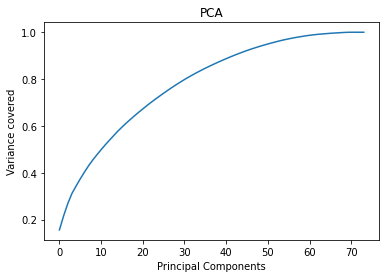

In [29]:
pca.fit_transform (x)
plt.figure ()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel ('Variance covered')
plt.title ('PCA')
plt.show()

From the PCA plot, we can tell that all the features are necessary to build the model

## Model Building

In [30]:
maxreg = 0 
maxrs = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    acc = LR.score(x_test,y_test)
    if acc>maxreg:
        maxreg = acc
        maxrs = i
print('Best regression score is:',maxreg,'on Random State',maxrs)

Best regression score is: 0.9352146228034957 on Random State 195


In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = 195)

### Linear Regression

In [32]:
LR = LinearRegression()
LR.fit(x_train,y_train)
lr = LR.score(x_test,y_test)
print('Regression Score:',lr)

y_pred_lr = LR.predict(x_test)

mae = mean_absolute_error(y_test,y_pred_lr)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred_lr)
print('Mean Squared Error:',mse)

Regression Score: 0.9352146228034957
Mean Absolute Error: 29.144102935276873
Mean Squared Error: 1493.215170386495


### Decision Tree Regressor

In [33]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dtt = dt.score(x_test,y_test)
print('Regression Score:',dtt)

y_pred_dt = dt.predict(x_test)

mae = mean_absolute_error(y_test,y_pred_dt)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred_dt)
print('Mean Squared Error:',mse)

Regression Score: 0.8063323376601279
Mean Absolute Error: 49.71782178217822
Mean Squared Error: 4463.777227722772


### Random Forest Regressor

In [34]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_ = rfr.score(x_test,y_test)
print('Regression Score:',rfr_)

y_pred_rfr = rfr.predict(x_test)

mae = mean_absolute_error(y_test,y_pred_rfr)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred_rfr)
print('Mean Squared Error:',mse)

Regression Score: 0.909571728904432
Mean Absolute Error: 34.0070297029703
Mean Squared Error: 2084.2491326732675


### KNeighborsRegressor

In [35]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_ = knn.score(x_test,y_test)
print('Regression Score:',knn_)

y_pred_knn = rfr.predict(x_test)

mae = mean_absolute_error(y_test,y_pred_knn)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred_knn)
print('Mean Squared Error:',mse)

Regression Score: 0.8636660398970749
Mean Absolute Error: 34.0070297029703
Mean Squared Error: 2084.2491326732675


### SVR

In [36]:
sv = SVR()
sv.fit(x_train,y_train)
sv_ = sv.score(x_test,y_test)
print('Regression Score:',sv_)

y_pred_sv = rfr.predict(x_test)

mae = mean_absolute_error(y_test,y_pred_sv)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred_sv)
print('Mean Squared Error:',mse)
SVR

Regression Score: 0.3468775524479568
Mean Absolute Error: 34.0070297029703
Mean Squared Error: 2084.2491326732675


sklearn.svm._classes.SVR

Linear regression has the highest R2 score with 0.93. Let us check whether the model is overfitting or underfitting.

## Cross Validation

In [37]:
sc = cross_val_score(LR,x,y,cv=5)
print('LR cvs:',sc.mean())

sc1 = cross_val_score(dt,x,y,cv=5)
print('DT cvs:',sc1.mean())

sc2 = cross_val_score(rfr,x,y,cv=5)
print('RFR cvs:',sc2.mean())

sc3 = cross_val_score(knn,x,y,cv=5)
print('KNN cvs:',sc3.mean())

sc4 = cross_val_score(sv,x,y,cv=5)
print('SVR cvs:',sc4.mean())

LR cvs: -5.4731658101858765e+17
DT cvs: 0.742119399654553
RFR cvs: 0.8783910090971311
KNN cvs: 0.8248107364656772
SVR cvs: 0.3217101659133924


Accuracy Score Cross-Validation Score
- Linear Regression        - 0.93         - -5.47
- Decision tree            - 0.80         - 0.73
- Random Forest Regressor  - 0.91         - 0.88
- KNeighbors Regressor     - 0.86         - 0.82
- SVR                      - 0.34         - 0.32

Random Forest regressor has regression score of 0.91 and the cross-validation score is 0.88. So, Random Forest Regressor is selected as the best fitting model

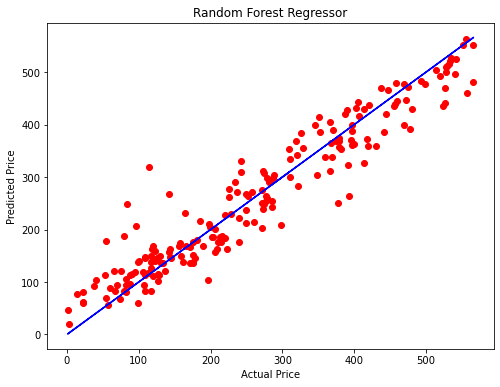

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred_rfr,color='r')
plt.plot(y_test,y_test,color = 'b')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest Regressor')
plt.show()

The best fit line mostly covers the data points

## Regularisation

In [39]:
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state': list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

clf.best_params_

{'alpha': 1, 'random_state': 0}

In [40]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.9371096578944067

In [41]:
cv_score = cross_val_score(ls,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean

0.9039021380478806

## Hyperparameter Tuning

In [42]:
params = {'bootstrap': [True, False],'min_samples_leaf': [1, 2, 4],'min_samples_split': [2, 5, 10],'max_features':['auto', 'sqrt', ],'n_estimators': [20,30,40,50,60,70,80,90,100],'random_state' : [195]} 
rnd_search = RandomizedSearchCV (estimator = rfr, cv = 5, param_distributions = params,n_iter = 10,n_jobs=1)
print(rnd_search.fit(x_train,y_train))
print('Best Estimator:', rnd_search.best_estimator_)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 30, 40, 50, 60, 70,
                                                         80, 90, 100],
                                        'random_state': [195]})
Best Estimator: RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=60, random_state=195)


In [43]:
rf = RandomForestRegressor(bootstrap=False, max_features='sqrt',n_estimators=90,random_state=195)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

print('Accuracy post tuning')
print(metrics.r2_score(y_test,y_pred))

Accuracy post tuning
0.920583394007196


## Save the model

In [44]:
import pickle
filename = 'housing_price.pkl'
pickle.dump(rf,open(filename,'wb'))

## Test

In [45]:
loaded_model=pickle.load(open('housing_price.pkl','rb'))
r2 = loaded_model.score(x_test,y_test)
print(r2)

0.920583394007196


In [49]:
pred = pd.read_csv(r"C:\Users\Lenovo\Desktop\DS\Internship\Project-Housing_splitted\test.csv.csv")

In [51]:
pred = pred.apply(enc.fit_transform)

In [52]:
pred

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0     61           0         2           47      215       1      2         0   
1    194          11         2           65       34       1      2         0   
2    173           0         2           65      180       1      2         3   
3    216           6         2           39      185       1      2         3   
4    238           5         2           47      220       1      2         0   
5    123          13         3            0        3       1      2         3   
6    289          13         3            6       12       1      2         3   
7     37           0         2           58      211       1      2         3   
8     82           8         2           65      199       1      2         3   
9    145          11         3            3       23       1      2         3   
10     8           1         3           24       42       1      2         0   
11   279           0         2           65      120       1      2         3   
12    80           0         2           55      240       1      2         3   
13   227           0         2           16      244       0      2         3   
14   144           0         2           59      216       1      2         3   
15    77           4         2           16       84       1      0         3   
16   275           0         2           65       98       1      2         0   
17   101           0         2           34      109       1      2         3   
18   247          12         1            6       13       1      2         3   
19    41          12         2           12       29       1      2         0   
20   217           6         3           16      103       1      2         3   
21   150           0         2           35       77       1      2         3   
22    34           0         2           65      147       1      2         0   
23   129          14         3           34       32       1      2         3   
24   268           1         2           18       41       1      2         3   
25   225           0         2            8       49       1      2         0   
26   291           5         2           26       66       1      2         3   
27    69           0         2           42       63       1      2         3   
28   278           5         2           49      178       1      2         3   
29   185           1         3           24      128       1      2         3   
30   234          10         3           32      102       1      2         3   
31   175           0         2           31      134       1      2         3   
32   142           0         2           34      109       1      2         3   
33   157           0         2           44      183       1      2         0   
34   126           1         2           18      104       1      2         3   
35   113           8         2           40      132       1      2         0   
36   172           5         2           34       87       1      2         0   
37   254          12         3            0        2       1      2         3   
38   249           5         2           65      201       1      2         0   
39   125          12         2            1        7       1      2         3   
40    28           0         3           16       36       1      2         3   
41    81           5         2           44      113       1      2         3   
42   156           5         2           65      194       1      2         0   
43   290           0         1           26       57       1      1         3   
44    72           9         2           21      100       1      2         0   
45   245           4         3           18       40       1      2         3   
46   209           0         2           34       59       1      2         3   
47    54           1         3            2       27       1      0         2   
48   220          11         2       

In [56]:
pred = pred.drop(['Id','Utilities','Alley','MiscFeature','PoolQC','Fence'],axis=1)

In [58]:
pred_fut = pd.DataFrame.from_dict({'Id': pred.index,'SalePrice': np.exp(loaded_model.predict(pred))})